# 1. Descripción del problema

**Entrada:** Arreglo (o lista) de **n** elementos 

**Salida:** Permutacion ordenada del arreglo de entrada 

Los problemas de ordenamiento son muy comunes en el area de la programación, por ese motivo se han buscado distintos metodos para poder ordenar un cierta cantidad de elementos, entre ellos esta el algoritmo del Insertion Sort, que es un forma bastante simple y natural de ordenar números.




# 2. Insertion Sort

A continuacion se describrá el algoritmo ***Insertion Sort*** y un código con su implementación.

## 2.1 Descripción Del algoritmo

El algoritmo recibe de entrada un arreglo o lista **A** de **n** elementos que queremos ordenar, luego de una serie de permutaciones los números quedarán ordenados dentro del arreglo.
<!-- 
Al inicio solo se tiene un elemento, por lo que el conjunto esta ordenado. Una vez que hay i elementos ordenados en el arreglo se toma el elemento i + 1 y se comparan con todos los elementos ya ordenados. -->

1. El algoritmo recorre el arreglo comparando `a[i]` con `a[i + 1]` siendo `i` el numero de elementos ya ordenados. Si `a[i]` > `a[i+1]` se realiza el intercambio. Esta comparacion se realiza con los anteriores elementos ya ordenados.

2. Una vez todos los elementos del arreglo se encuentran ordenados o bien se haya terminado de recorrerlo finaliza el algoritmo.

3. Cuando solo hay un elemento en el arreglo se asume que ya esta ordenado.

4. Al final se retorna el arreglo de entrada ya ordenado.

La siguiente imagen muestra de manera clara la lógica de ordenamiento.

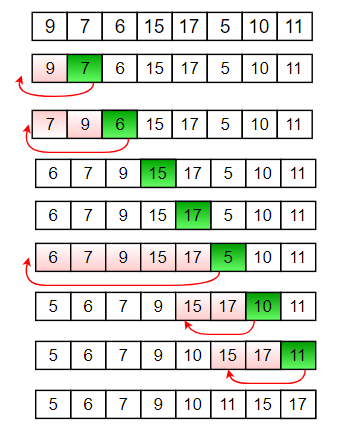

## 2.2 Ejemplo:
Tomemos un arreglo "A"

**A = [5,3,7,2,4]**

3 es menor que el 5, realizamos el cambio.

**A = [3,5,7,2,4]**

7 no es menor que 5 asi que queda igual.

2 es menor a 7, a 5 y a 3, entonces realizamos el cambio. Nos queda: 

**A = [2,3,5,7,4]**

4 es menor a 7 y a 5, entonces nos queda:

**A = [2,3,4,5,7]**

Arreglo ordenado.



## 2.3 Código

In [18]:
import random
from termcolor import colored
import copy


def insertion_sort(a,verbose=False):
  n = len(a)
  contador = 0 #contador de comparaciones
  aux = 0
  respaldo = 0

  if verbose == True: print ("Input array: ",a)

  for i in range (1,len(a)):
    sorted = True
    respaldo = i
    
    if verbose == True: print("\nPasada ",i)
    key = a[i]

    for k in range (i - 1,-1,-1):
      contador += 1
      aux += 1

      if a[k] < key:
        a[k + 1] = key
        break

      #Verbose
      if verbose == True: 
        if sorted == False:
          i -= 1
        print(str(a[:i])[1:-1],",",colored(f"{str(a[i:i+1])[1:-1]}","red"),str(a[i+1:])[1:-1])
        sorted = False

      a[k + 1] = a[k]
      a[k] = key

    i = respaldo

    if key < a[0]:
      a[0] = key
    
    


    #Verbose
    if verbose == True: 
      print("\nÚltimo Cambio:")
      #print(str(a)[1:-1])
      print(colored(f"{str(a[:i+1])[1:-1]}","blue"),str(a[i + 1:])[1:-1])

  if verbose == True: print("\noutput array:",a)

  aux = aux / (n - 1)
  
  return a,contador,aux


#Arreglo de ejemplo:
A = [5,2,4,1]
print("Entrada : ",A)
A,counter,aux = insertion_sort(A)
print("Salida : ",A)
print("Comparaciones : ",counter)
print("promedio retroceso: ",aux)


Entrada :  [5, 2, 4, 1]
Salida :  [1, 2, 4, 5]
Comparaciones :  6
promedio retroceso:  2.0


## 2.4 Ejecución del algoritmo paso a paso `Verbose = True`

In [13]:
import random
a = random.sample(range(1, 50), 7)
a,c,aux= insertion_sort(a,verbose=True)

Input array:  [44, 29, 7, 17, 28, 20, 36]

Pasada  1
44 , 29 7, 17, 28, 20, 36

Último Cambio:
29, 44 7, 17, 28, 20, 36

Pasada  2
29, 44 , 7 17, 28, 20, 36
29 , 7 44, 17, 28, 20, 36

Último Cambio:
7, 29, 44 17, 28, 20, 36

Pasada  3
7, 29, 44 , 17 28, 20, 36
7, 29 , 17 44, 28, 20, 36

Último Cambio:
7, 17, 29, 44 28, 20, 36

Pasada  4
7, 17, 29, 44 , 28 20, 36
7, 17, 29 , 28 44, 20, 36

Último Cambio:
7, 17, 28, 29, 44 20, 36

Pasada  5
7, 17, 28, 29, 44 , 20 36
7, 17, 28, 29 , 20 44, 36
7, 17, 28 , 20 29, 44, 36

Último Cambio:
7, 17, 20, 28, 29, 44 36

Pasada  6
7, 17, 20, 28, 29, 44 , 36 

Último Cambio:
7, 17, 20, 28, 29, 36, 44 

output array: [7, 17, 20, 28, 29, 36, 44]


El color rojo muestra el número que se desplaza a la posición que le corresponde. El color azul muestra los números ya ordenados.

## 3. Correctitud

El algoritmo Insertion Sort genera un arreglo con los mismos elementos del arreglo de entrada ordenados de menor a mayor.

Para probar que el algoritmo es correcto utilizaremos la propiedad **invariante de bucle**, para ello tomaremos dos consideraciones.

1. La propiedad sera verdadera en antes de la primera iteracion. Esto se le conoce como Inicialización.

2. La propiedad sera verdadera antes y después de la iteración. Esto se le conoce como Manteción.

En la inicialización la variable **i** comienza en 1, por lo tanto `a[0..i-1]` corresponde al primer valor del arreglo que es trivialmente verdadero.

Por otro lado en la mantención analizamos lo que ocurre en la i-ésima iteración. Antes de comenzar la iteración asumimos que el arreglo ya se encuentra ordenado y sus elementos son los mismos de entrada. Entonces, cuando iteramos movemos el nuevo elemento hasta la posición que le corresponde. Por lo tanto, después de la iteración, el arreglo seguirá estando ordenado.

Como ambas afirmaciones son verdaderas, se cumple la propiedad.






## 4. Tiempo de Ejecución

Teorema (Tiempo de ejecución).
El algoritmo Insertion Sort tiene un tiempo de ejecución de $O(n^2)$  en el peor caso. Esto ocurre cuando se quiere ordenar un arreglo de menor a mayor y los elementos de entrada se encuentran en orden de mayor a menor. Por ejemplo:



In [ ]:
a =[6,4,3,1];
print("Entrada no ordenada:",a)
a,counter,aux=insertion_sort(a,True)
print("Salida ordenada:",a)
print("Total de comparaciones realizadas:",counter)

Entrada no ordenada: [6, 4, 3, 1]
Input array:  [6, 4, 3, 1]

Pasada  1
6 , 4 3, 1

Último Cambio:
4, 6 3, 1

Pasada  2
4, 6 , 3 1
4 , 3 6, 1

Último Cambio:
3, 4, 6 1

Pasada  3
3, 4, 6 , 1 
3, 4 , 1 6
3 , 1 4, 6

Último Cambio:
1, 3, 4, 6 

output array: [1, 3, 4, 6]
Salida ordenada: [1, 3, 4, 6]
Total de comparaciones realizadas: 6


El tiempo de ejecución tambien se puede ver de manera mas simple observando los ciclos anidados que tiene el algoritmo, uno externo que se itera n veces y otro interno que también itera n veces, obteniendo una complejidad $O(n^2)$

## 5. Experimentos


A continuación se realizarán experimentos de:
1. cantidad de comparaciones en el mejor y peor caso.
2. Mostrar que sucede cuando se utiliza en un arreglo casi completamente ordenado.
3. Comparar los tiempos de ejecución con el algoritmo **BubbleSort**



### 5.1 Número de comparaciones

Se establece que el tamaño del problema es $n \in [5,24]$ y el arreglo de entrada son números entre 1 y 100 

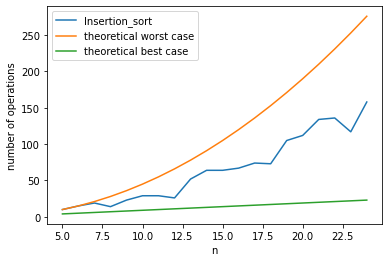

In [15]:
import matplotlib.pyplot as plt

x=[n for n in range(5,25)] 
y1=[n*(n-1)/2 for n in range(5,25)] # worst case
y2=[n-1 for n in range(5,25)] # best case
y=[]; 

for n in range(5,25):
  a = random.sample(range(1, 100), n)
  a,counter,aux = insertion_sort(a)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Insertion_sort", "theoretical worst case", "theoretical best case"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

Podemos observar que el tiempo de ejecución está entre el peor y mejor caso teórico, con una distancia similar entre ambos.

### 5.2 Diferencia de comparaciones

Tenemos dos arreglos de igual tamaño que utilizan el mismo algoritmo de Insertion Sort, sin embargo, uno de ellos tiene de entrada números casi ordenados, mientras que otro son totalmente aleatorios. En base al algoritmo implementado anteriormente se puede distingir facilmente que la cantidad de comparaciones va aumentando a medida que los elementos del arreglo estén mas desordenaos. No solo eso, si no también su media de retrocesos como muestra el ejemplo:

In [30]:

a = [2,3,4,5,6,7,8,9,10,14,11,12,13,15,16,17,18,19,20,21]
b = random.sample(range(1, 50), 20)

a,counter1,aux1 = insertion_sort(a)
a,counter2,aux2 = insertion_sort(b)

print("Comparaciones arreglo casi ordenado: ",counter1)
print("promedio retroceso: ",end="")
print('%.2f' % aux1)
print("\nComparaciones arreglo no ordenado: ",counter2)
print("promedio retroceso: ",end="")
print('%.2f' % aux2)



Comparaciones arreglo casi ordenado:  22
promedio retroceso: 1.16

Comparaciones arreglo no ordenado:  108
promedio retroceso: 5.68


### 5.3 Tiempo de ejecución de Insertion Sort y BubbleSort

A continuación se muestra el tiempo de ejecución del algoritmo Insertion Sort y del BubbleSort en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre  5  y  500

**BubbleSort:**

In [ ]:
import random
from termcolor import colored
import copy

def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 #contador de comparaciones

    if verbose == True: print("input array:",a)

    for i in range(1,n+1):
        if verbose == True: print("\nPasada",i)
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                if verbose == True: 
                  print(str(a[:j])[1:-1],",",colored(f"{str(a[j:j+2])[1:-1]}","red"),",",str(a[j+2:])[1:-1])

                already_sorted = False

        if already_sorted == False and verbose == True: 
           print("\nAl finalizar pasada:")
           print(str(a[:n-i])[1:-1],",",colored(f"{str(a[n-i:])[1:-1]}","blue"))

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a, T

# Ejemplo
A = [5,8,7,1,3]
print("Entrada: ",A)
A, counter = bubble_sort(A)
print("Salida: ",A)
print("# comparaciones: ", counter)

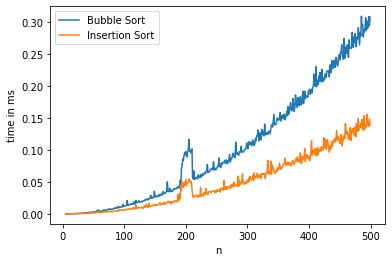

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]
ix=[]; by=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  z = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)

  ix.append(n)
  by.append(z)



  t = repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(ix,by)

plt.plot(x,y)


plt.legend(["Bubble Sort","Insertion Sort"])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como podemos apreciar, hay una clara diferencia en el tiempo de ejecución entre ambos algoritmos. A medida que va aumentando el tamaño del arreglo, el algoritmo BubbleSort va agrandando la brecha de tiempo con el InsertionSort.